<h3> 1. Parameter 설정

In [37]:
import sys
import os
from tqdm import tqdm
from kaggle_environments import make
import numpy as np
from matplotlib import pyplot as plt

from src import dqn
from src import environment
from src import play
from src import agent


env = environment.ConnectX()

model_params = {
    "state_n": env.observation_space.n,
    "action_n": env.action_space.n,
    "hidden_layer": [128, 128, 128, 128, 128],
    "gamma": 0.99,
    "max_buffer": 1000,
    "min_buffer": 100,
    "batch_size": 50,
    "lr": 0.01,
}

params = {
    "episodes": 300,
    "epsilon_greedy": 0.5,
    "copy_step": 50
}

<h3> 2. 학습

In [38]:
if __name__ == "__main__":

    # Model Training
    TrainNet = dqn.DQN(**model_params)
    TargetNet = dqn.DQN(**model_params)

    # Stepping Episodes
    all_episode_sum_reward = np.empty(params["episodes"])
    all_episode_avg_reward = np.empty(params["episodes"])
    # play_game(env, TrainNet, TargetNet, params["epsilon_greedy"], params["copy_step"])

    _play = play.Play(env, TrainNet, TargetNet, params["epsilon_greedy"], params["copy_step"])

    progress = tqdm(range(params["episodes"]))

    for steps in progress:
        # one_episode_sum_reward = play_game(env, TrainNet, TargetNet, params["epsilon_greedy"], params["copy_step"])
        one_episode_sum_reward = _play.play_game()
        all_episode_sum_reward[steps] = one_episode_sum_reward
        one_episode_avg_reward = np.mean(all_episode_sum_reward[max(0, steps - 100):(steps+1)])
        all_episode_avg_reward[steps] = one_episode_avg_reward

        progress.set_postfix({
            "episode_reward": one_episode_sum_reward,
            "average reward": one_episode_avg_reward
        })

100%|████████████████████| 300/300 [00:26<00:00, 11.45it/s, episode_reward=1, average reward=0.624]


<h3> 3. Episode에 따른 Rewards

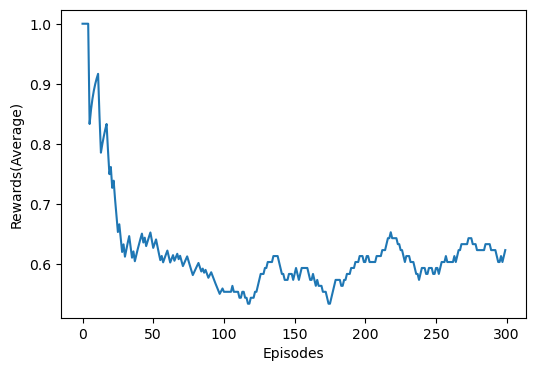

In [39]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('Episodes')
plt.ylabel('Rewards(Average)')
plt.plot(all_episode_avg_reward)

<h3> 4. 학습된 Agent로 게임해보기

In [40]:
# Feed Forward로 Agent 만들기
def agent(observation, configuration):
    state = observation.board[:]
    state.append(observation.mark)

    out = TrainNet.predict(np.atleast_2d(TrainNet.preprocess(observation)))[0].detach().numpy()

    for i in range(configuration.columns):
        if observation.board[i] != 0:
            out[i] = -1e7

In [41]:
env_run = make("connectx", debug=True)
env_run.reset()
env_run.run([agent, "random"])
env_run.render(mode="ipython", width=500, height=450)